In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
INPUT64_OUTPUT12 = '../64input_12output_derk'
ONLY_PISTOL = '../only_pistol'
Q_LEARNING_1000_ACTIONS = '../q-learning-1000-actions'
Q_LEARNING_25_ACTIONS = '../q-learning-25-actions'

In [51]:
!ls {INPUT64_OUTPUT12} {ONLY_PISTOL} {Q_LEARNING_1000_ACTIONS} {Q_LEARNING_25_ACTIONS}

../64input_12output_derk:
64input_12output.ini   best_stats.pkl	    species_stats.pkl
64input_12output.toml  extensive_stats.pkl  winner.pkl

../only_pistol:
best_stats.pkl	     only_pistol_neat.ini   species_stats.pkl
extensive_stats.pkl  only_pistol_neat.toml  winner.pkl

../q-learning-1000-actions:
best_stats.pkl	     q_learning_1000_actions.ini   species_stats.pkl
extensive_stats.pkl  q_learning_1000_actions.toml  winner.pkl

../q-learning-25-actions:
best_stats.pkl	     q_learning_25_actions.ini	 species_stats.pkl
extensive_stats.pkl  q_learning_25_actions.toml  winner.pkl


In [52]:
def load_run(directory):
    best_stats = pd.read_pickle(f'{directory}/best_stats.pkl')
    extensive_stats = pd.read_pickle(f'{directory}/extensive_stats.pkl')
    species_stats = pd.read_pickle(f'{directory}/species_stats.pkl')
    return best_stats, extensive_stats, species_stats

In [53]:
input64_bs, input64_ext, input64_spc = load_run(INPUT64_OUTPUT12)
only_pistol_bs, only_pistol_ext, only_pistol4_spc = load_run(ONLY_PISTOL)
qlearning1000_bs, qlearning1000_ext, qlearning1000_spc = load_run(Q_LEARNING_1000_ACTIONS)
qlearning25_bs, qlearning25_ext, qlearning25_spc = load_run(Q_LEARNING_25_ACTIONS)

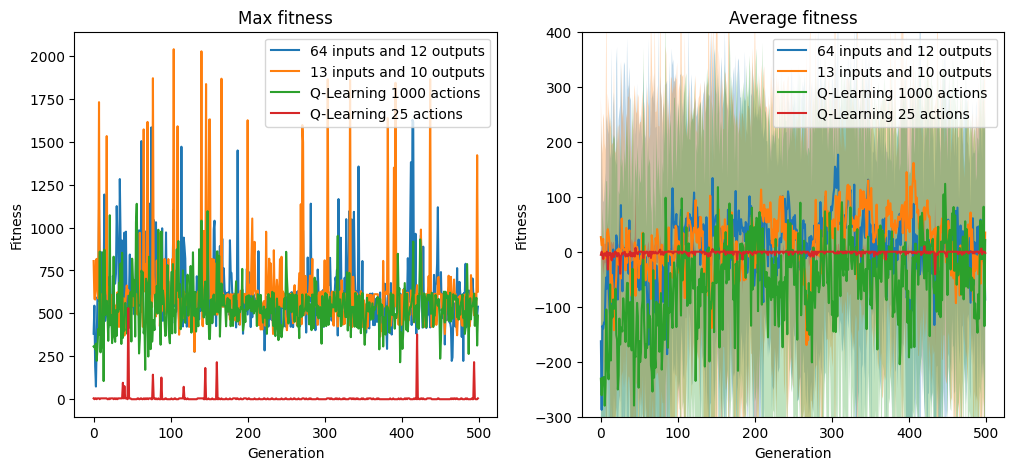

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
input64_bs.plot.line(x='generation', y='fitness', ax=axs[0], label='64 inputs and 12 outputs')
only_pistol_bs.plot.line(x='generation', y='fitness', ax=axs[0], label='13 inputs and 10 outputs')
qlearning1000_bs.plot.line(x='generation', y='fitness', ax=axs[0], label='Q-Learning 1000 actions')
qlearning25_bs.plot.line(x='generation', y='fitness', ax=axs[0], label='Q-Learning 25 actions')
input64_bs.plot.line(x='generation', y='mean', ax=axs[1], label='64 inputs and 12 outputs')
only_pistol_bs.plot.line(x='generation', y='mean', ax=axs[1], label='13 inputs and 10 outputs')
qlearning1000_bs.plot.line(x='generation', y='mean', ax=axs[1], label='Q-Learning 1000 actions')
qlearning25_bs.plot.line(x='generation', y='mean', ax=axs[1], label='Q-Learning 25 actions')
axs[1].fill_between(
    input64_bs.generation,
    input64_bs['mean'] - input64_bs.stdev,
    input64_bs['mean'] + input64_bs.stdev,
    alpha=0.3,
    label='Standard Deviation'
)
axs[1].fill_between(
    only_pistol_bs.generation,
    only_pistol_bs['mean'] - only_pistol_bs.stdev,
    only_pistol_bs['mean'] + only_pistol_bs.stdev,
    alpha=0.3,
    label='Standard Deviation'
)
axs[1].fill_between(
    qlearning1000_bs.generation,
    qlearning1000_bs['mean'] - qlearning1000_bs.stdev,
    qlearning1000_bs['mean'] + qlearning1000_bs.stdev,
    alpha=0.3,
    label='Standard Deviation'
)
axs[1].fill_between(
    qlearning25_bs.generation,
    qlearning25_bs['mean'] - qlearning25_bs.stdev,
    qlearning25_bs['mean'] + qlearning25_bs.stdev,
    alpha=0.3,
    label='Standard Deviation'
)
axs[1].set_ylim([-300, 400])
axs[0].set_xlabel("Generation")
axs[1].set_xlabel("Generation")
axs[0].set_ylabel("Fitness")
axs[1].set_ylabel("Fitness")
axs[0].set_title("Max fitness")
axs[1].set_title("Average fitness")
plt.show()

In [43]:
extensive_stats

,generation,species,genome,fitness
0,0,1,1,-479.038513
1,0,2,2,-365.974060
2,0,3,3,-395.772552
3,0,4,4,-477.157471
4,0,5,5,-477.157471
...,...,...,...,...
14995,499,492,9950,-444.264648
14996,499,485,9932,538.987488
14997,499,485,9951,-14.938038
14998,499,485,9952,-105.785561


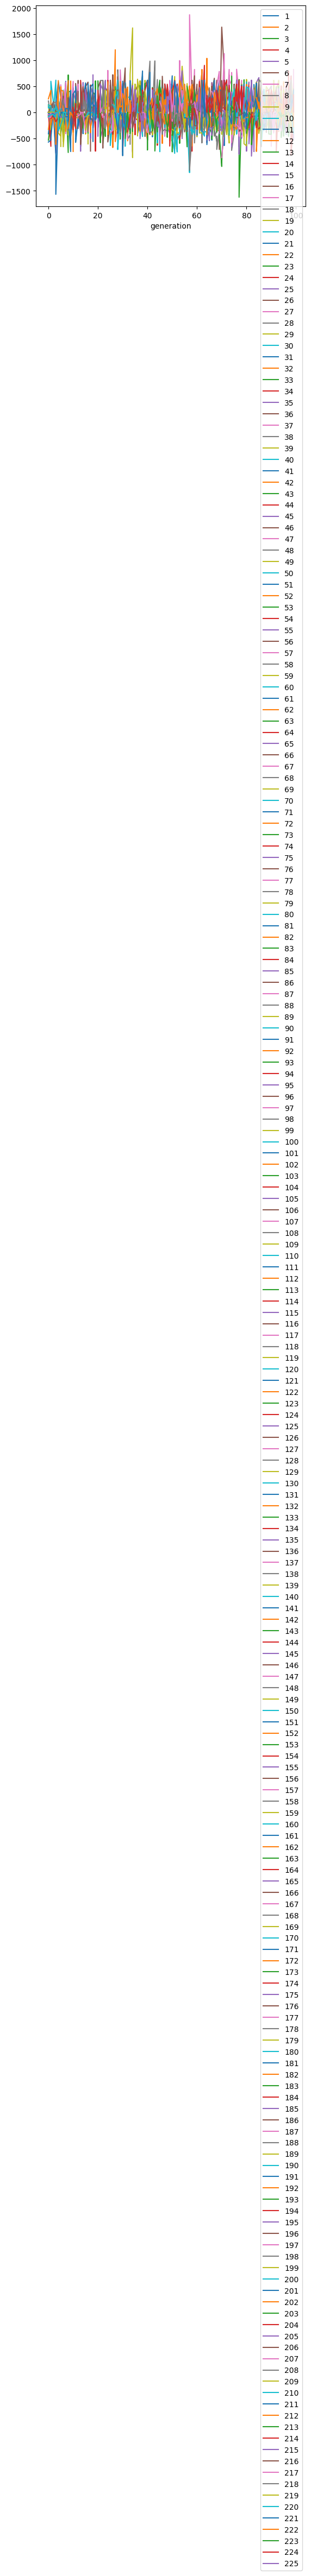

In [24]:
fig, ax = plt.subplots(1)
for s in extensive_stats.species.unique():
    extensive_stats[extensive_stats.species == s].plot.line(
        x='generation',
        y='fitness',
        ax=ax,
        label=str(s)
    )

In [25]:
species_stats

,generation,species_sizes
0,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,"[0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 0, ..."
2,2,"[0, 2, 2, 3, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, ..."
3,3,"[0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, ..."
4,4,"[0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, ..."
...,...,...
95,95,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
96,96,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
97,97,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
98,98,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
